In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import joblib

%matplotlib inline
from matplotlib import pyplot as plt

# import matplotlib.pyplot
from os import getcwd
getcwd()

'C:\\Users\\Alec\\Documents\\Programming_Resources\\Boot_Camp\\project-04\\CISautoData\\ipynb'

# Correlations

#### Observe corellations for all makes

import seaborn as sn
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (19.20,10.80))

corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.savefig('visualizations/sedan_total_corr.png')

When observed as a whole, the corellations between certain features are below significancee

when each make is split into a group, the correlations are more easily observed

make_list = df['make'].unique()

for i, make in enumerate(make_list):
    df_new = df.loc[df['make']==f'{make}']
    df_new = df_new.drop(columns=['makeID'])
    fig = plt.figure(figsize = (19.20,10.80))

    corrMatrix = df_new.corr()
    sn.heatmap(corrMatrix, annot=True)
    plt.title(f'{make}')
    plt.savefig(f'visualizations/Sedan_Correlations/sedan_{make}_corr.png')
    plt.close()

with the overall data giving un-usable correlations we may need to have a regression model for each make/body class?

Test the difference between a prediction using the total data and a single make, data.

---------------------

# Random Forest Regrssion

-----------

In [2]:
df = pd.read_csv('../csv/SEDAN_DATA_CLEAN.csv')
df.head()

,body_class,brand_name,model_name,model_ID,model_year,mileage,ask_price,msrp,color,engine_cylinders,fuel_type_primary,vin
0,sedan,FORD,Taurus,1782.0,2015.0,67588,16462,16462,Ingot Silver Metallic,6.0,Gasoline,85384fd9108f6e9c75d7a538e4ce8a892170f7dbf42264...
1,sedan,CHRYSLER,300,1878.0,2017.0,9231,23962,23962,Billet Silver Metallic Clearcoat,6.0,Gasoline,5c45a1254ea832cffc329eebf700acf918682c1b40f9a7...
2,sedan,LINCOLN,MKZ,1790.0,2016.0,19710,22962,22962,White Platinum Metallic Tri-Coat,6.0,Gasoline,95592374eecca29c4614b5987b760f9b528e6d3e33c2db...
3,sedan,FORD,Fiesta,3267.0,2011.0,92053,5962,5962,Blue,4.0,Gasoline,5558ab8c6833c13904fa4a1fbd45c8d00d02f6db9e53fe...
4,sedan,INFINITI,G37,2337.0,2013.0,74917,13962,13962,Vibrant Red,6.0,Gasoline,10e990a77a9615aca1f0e2210513a289fe54a9175a522d...


In [3]:
depth = 7
model_results = {}
train_score_list = []
test_score_list = []
df_test = df.drop(columns=['msrp','vin','color'])
#names for each DF/ Model to be trained


# divide the data
X = df_test.drop(columns=['ask_price'])
y = df_test['ask_price']

# set dummies
X_dummies = pd.get_dummies(X,drop_first=True)

# split for test and train
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, random_state=42)

# model parameters
model = RandomForestRegressor(max_depth=depth,n_estimators=100, random_state=12)

# fit the model to the data
model.fit(X_train, y_train)

# evaluate scores and predictions
train_predicted = model.predict(X_train)
test_predicted = model.predict(X_test)

train_score = model.score(X_train,y_train,sample_weight=None)
test_score = model.score(X_test,y_test,sample_weight=None)

# record results

model_results['model'] = model

model_results['train_y_pred'] = train_predicted
model_results['test_y_pred'] = test_predicted

model_results['train_score']  = train_score
model_results['test_score']  = test_score

train_score_list.append(train_score)
test_score_list.append(test_score)


In [4]:
model_results['columns'] = X_train.columns.to_list()

In [5]:
model_results

{'model': RandomForestRegressor(max_depth=7, random_state=12),
 'train_y_pred': array([15656.5796279 , 15656.5796279 , 28330.96320555, ...,
        15656.5796279 , 15656.5796279 , 12301.02410649]),
 'test_y_pred': array([15993.23581998,  8096.03485204, 10882.21414013, ...,
        12287.8416809 , 15656.5796279 , 15656.5796279 ]),
 'train_score': 0.8134483688403654,
 'test_score': 0.812269695870799,
 'columns': ['model_ID',
  'model_year',
  'mileage',
  'engine_cylinders',
  'brand_name_ALFA ROMEO',
  'brand_name_ASTON MARTIN',
  'brand_name_AUDI',
  'brand_name_BENTLEY',
  'brand_name_BMW',
  'brand_name_BUICK',
  'brand_name_CADILLAC',
  'brand_name_CHEVROLET',
  'brand_name_CHRYSLER',
  'brand_name_DODGE',
  'brand_name_FORD',
  'brand_name_GENESIS',
  'brand_name_HONDA',
  'brand_name_HYUNDAI',
  'brand_name_INFINITI',
  'brand_name_JAGUAR',
  'brand_name_KIA',
  'brand_name_LEXUS',
  'brand_name_LINCOLN',
  'brand_name_MASERATI',
  'brand_name_MAZDA',
  'brand_name_MERCEDES-BENZ',

In [6]:
model = model_results['model']
joblib.dump(model,'../models/sedan_depth_7_81_no_color.joblib')

['../models/sedan_depth_7_81_no_color.joblib']

In [7]:
model = joblib.load('../models/sedan_depth_7_81_no_color.joblib')

In [8]:
model.score(X_test,y_test,sample_weight=None)

0.812269695870799

In [9]:
model.predict(X_test)

array([15993.23581998,  8096.03485204, 10882.21414013, ...,
       12287.8416809 , 15656.5796279 , 15656.5796279 ])

In [10]:
model_results['test_y_pred']

array([15993.23581998,  8096.03485204, 10882.21414013, ...,
       12287.8416809 , 15656.5796279 , 15656.5796279 ])

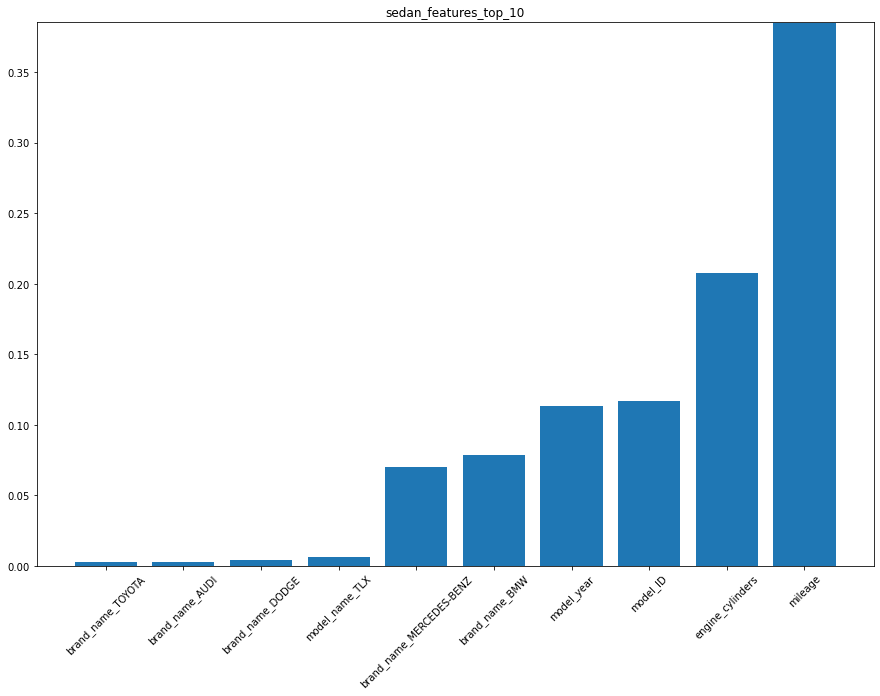

In [14]:
feature_importances = model.feature_importances_
features = sorted(zip(X_test.columns, model.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features[-10:]]
width = [f[1] for f in features[-10:]]

fig, ax = plt.subplots()

fig.set_size_inches(15,10)
plt.margins(y=0.001)

plt.bar(x=cols, height=width)
plt.title('sedan_features_top_10')
plt.xticks(rotation=45)
plt.savefig('../visualizations/sedan_top_10_cols.png')
plt.show()


In [15]:
print(model_results['columns'])

['model_ID', 'model_year', 'mileage', 'engine_cylinders', 'brand_name_ALFA ROMEO', 'brand_name_ASTON MARTIN', 'brand_name_AUDI', 'brand_name_BENTLEY', 'brand_name_BMW', 'brand_name_BUICK', 'brand_name_CADILLAC', 'brand_name_CHEVROLET', 'brand_name_CHRYSLER', 'brand_name_DODGE', 'brand_name_FORD', 'brand_name_GENESIS', 'brand_name_HONDA', 'brand_name_HYUNDAI', 'brand_name_INFINITI', 'brand_name_JAGUAR', 'brand_name_KIA', 'brand_name_LEXUS', 'brand_name_LINCOLN', 'brand_name_MASERATI', 'brand_name_MAZDA', 'brand_name_MERCEDES-BENZ', 'brand_name_MERCURY', 'brand_name_MITSUBISHI', 'brand_name_NISSAN', 'brand_name_OLDSMOBILE', 'brand_name_PONTIAC', 'brand_name_PORSCHE', 'brand_name_SATURN', 'brand_name_SUBARU', 'brand_name_TOYOTA', 'brand_name_VOLKSWAGEN', 'brand_name_VOLVO', 'model_name_300', 'model_name_300C', 'model_name_320i', 'model_name_323i', 'model_name_325i', 'model_name_325xi', 'model_name_328d', 'model_name_328i', 'model_name_328xi', 'model_name_330e', 'model_name_330i', 'model_n